# Parse and plot iCaRL results

In [40]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import json
from collections import defaultdict

from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

%matplotlib notebook

### Plot data

In [46]:
def get_data(data_path):
    with open(data_path) as json_file:
        data = json.load(json_file)
    run_stamps = defaultdict(list)
    accuracy_data = defaultdict(list)
    for idx, run in enumerate(data['results']):
        for classrange, acc in run.items():
            run_stamps[classrange].append(idx)
            accuracy_data[classrange].append(acc)
    return run_stamps, accuracy_data

def get_color_map(labels):
    cmap = plt.cm.get_cmap('jet')
    colors = {}
    for idx, label in enumerate(labels):
         colors[label] = cmap(idx*1.0/len(labels))
    return colors

def plot_data(run_stamps, accuracy_data, **kwargs):
    color_map = get_color_map(accuracy_data.keys())
    for classrange in accuracy_data:
        plt.plot(run_stamps[classrange], accuracy_data[classrange], label=classrange, color=color_map[classrange], **kwargs)
    #plt.legend()

def read_data_and_plot(data_path, filter_classes = None, **kwargs):
    run_stamps, accuracy_data = get_data(data_path)
    if filter_classes is not None:
        run_stamps = {k: run_stamps[k] for k in filter_classes}
        accuracy_data = {k: accuracy_data[k] for k in filter_classes}
    #plt.figure()
    plot_data(run_stamps, accuracy_data, **kwargs)
    #plt.show()

<IPython.core.display.Javascript object>


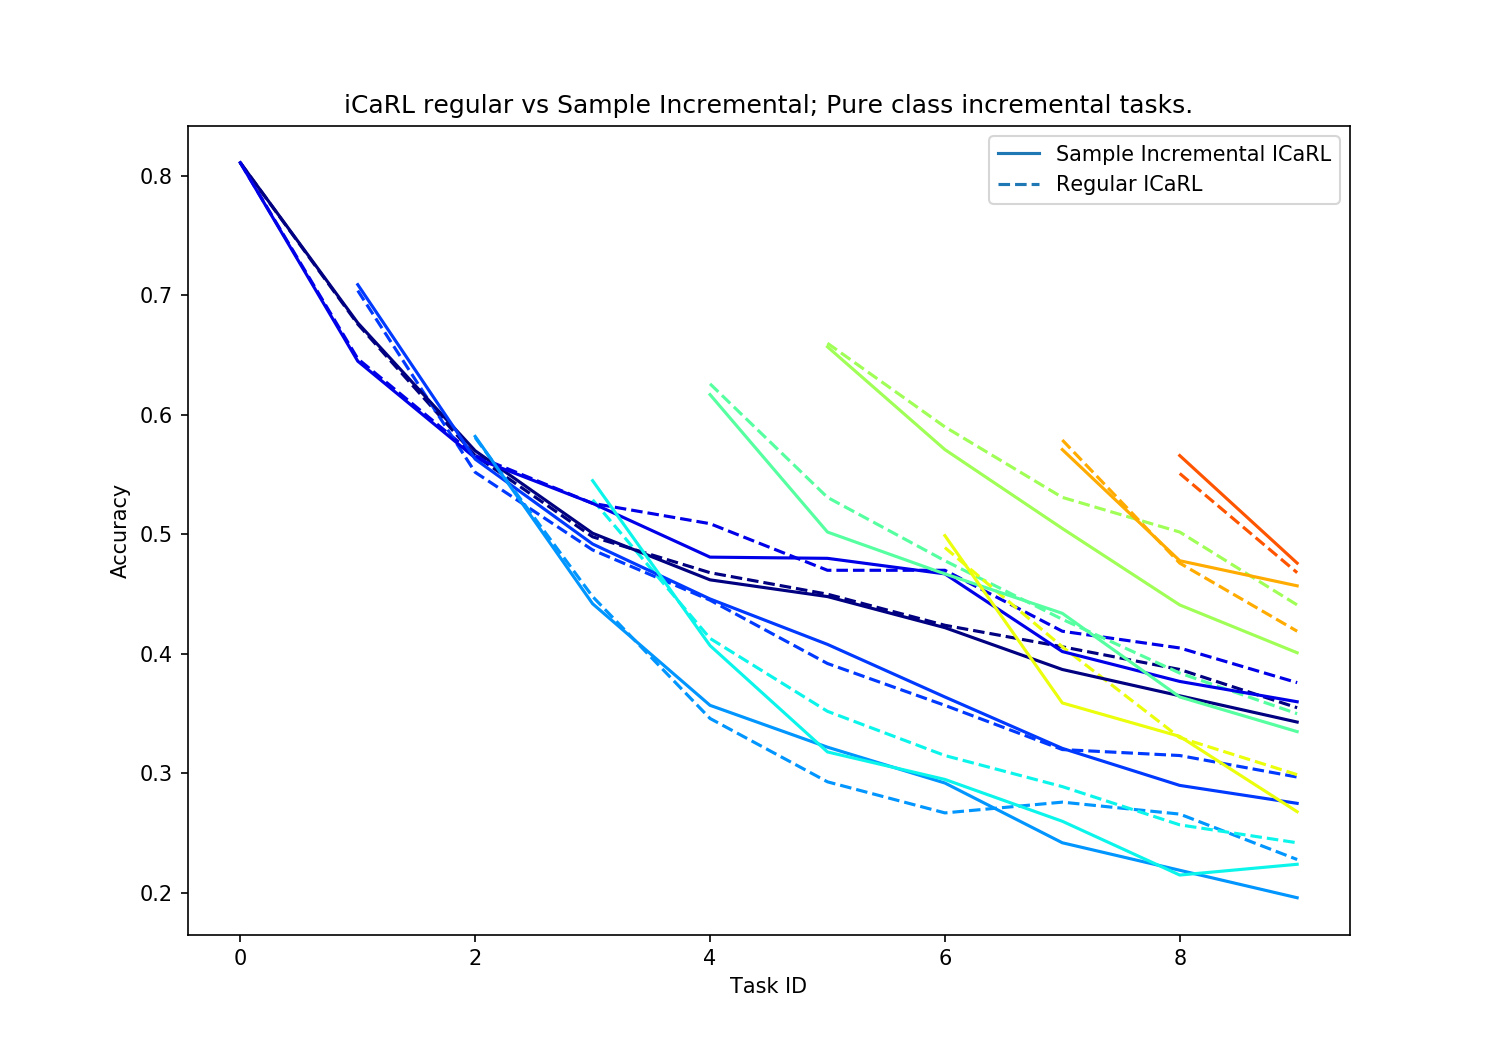

In [67]:
plt.figure()
read_data_and_plot('icarl_base.json', linestyle='--')
read_data_and_plot('icarl_adaptiveweights_classincr.json', linestyle='-')
plt.title("iCaRL regular vs Sample Incremental; Pure class incremental tasks.")
plt.xlabel('Task ID')
plt.ylabel('Accuracy')
lines = [Line2D([0], [0], linestyle='-'), Line2D([0], [0], linestyle='--')]
labels = ['Sample Incremental ICaRL', 'Regular ICaRL']
plt.legend(lines, labels)

<IPython.core.display.Javascript object>


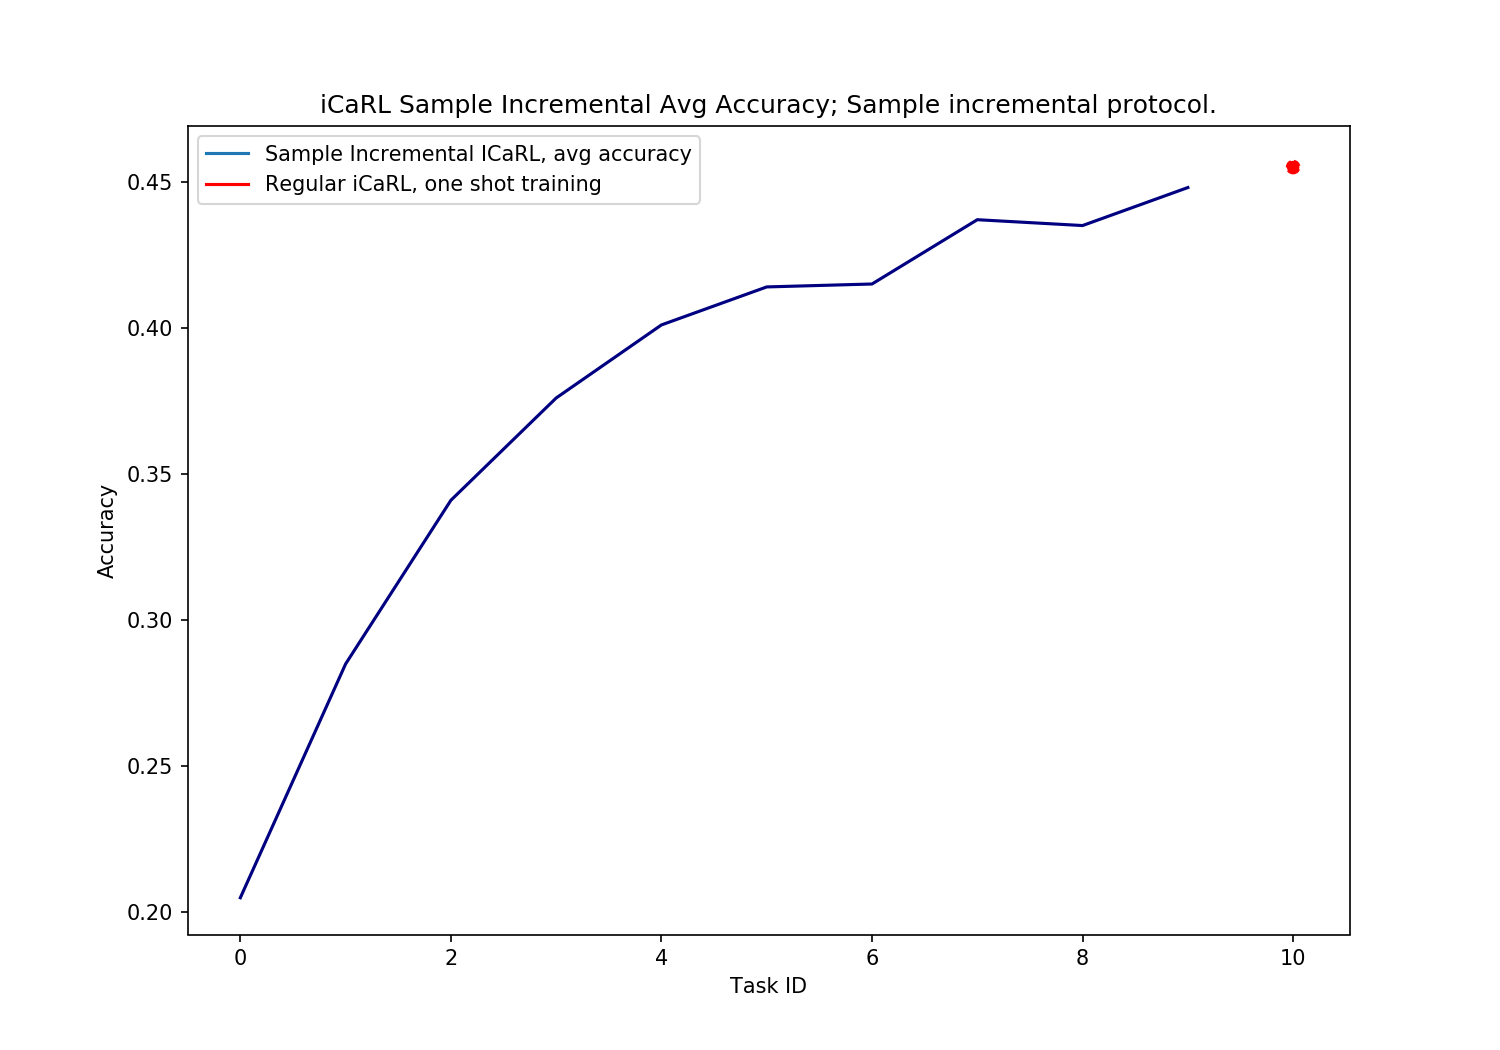

In [65]:
plt.figure()
read_data_and_plot('icarl_adaptiveweights_sampleincr.json', filter_classes=["total"], linestyle='-')
plt.scatter([10], [0.455], linestyle='--', color='red')
plt.title("iCaRL Sample Incremental Avg Accuracy; Sample incremental protocol.")
plt.xlabel('Task ID')
plt.ylabel('Accuracy')
lines = [Line2D([0], [0], linestyle='-'), Line2D([0], [0], linestyle='-', color='red')]
labels = ['Sample Incremental ICaRL, avg accuracy', 'Regular iCaRL, one shot training']
plt.legend(lines, labels)